In [1]:
from lib_plot import plot_R_t
from lib_sim import compute_spin_dynamics_TWA, chain_positions,generate_thermal_distribution_in_cylinder
from lib_exact import compute_spin_dynamics_exact
import numpy as np
import scipy.constants as cst
import qutip as qt


In [2]:
# Define simulation parameters
num_particles=100           # Number of particles in the chain

listNumparticles=[100]       # List of particle numbers to simulate

spacing_factor=1       # Spacing between particles as a fraction of wavelength

t_max_factor=5          # Maximum simulation time as a factor of Gamma_0

num_steps=4000              # Number of time steps for the simulation

omega_z=0                   # Detuning (in rad/s)

num_simulations=5000       # Number of TWA trajectories to average
# listNumparticles=[200]       # List of particle numbers to simulate

time_factor = 10 # compression factor for the time steps to save memory

# Physical constants
atomic_dipole_moment = 2.533e-29 #C·m

dipole_moment=(1/np.sqrt(2))*np.array([1, 1j, 0])*atomic_dipole_moment  # Circular polarization

Gamma_0 = 2*np.pi *6.065 *1e6    # Natural linewidth in rad/s (≈ 38 MHz)

Omega_Rabi= 5*Gamma_0             # Rabi frequency (set to 0 for no driving)


lambda_0 = 780e-9                # Laser wavelength in m (780 nm for Rb)

omega = 2*np.pi*cst.c/lambda_0

T = 50e-6 # T is 50 uK

E_0 = 0.1
# chain of particles
# positions = chain_positions(num_particles, spacing_factor, lambda_0)

# themal distribution inside of cylinder (PHOENIQS SETUP)
positions = generate_thermal_distribution_in_cylinder(num_particles,lambda_0*2,lambda_0*20,E_0)

t_list = np.linspace(0,t_max_factor/Gamma_0,num_steps)

In [3]:
t_list = np.linspace(0,t_max_factor/Gamma_0,num_steps//time_factor)


In [4]:
positions

array([[-4.74784003e-08, -8.04153426e-10, -2.17893081e-07],
       [-1.29074715e-07,  1.38573252e-07, -4.54893526e-07],
       [ 1.41996027e-08, -7.28915107e-09, -5.65176108e-07],
       [-2.11584812e-07, -1.04225380e-07,  1.75526087e-06],
       [ 1.90692202e-07,  5.30228651e-07, -2.25270660e-07],
       [-1.43302522e-07,  2.37336449e-07, -3.15330444e-07],
       [-1.73739796e-07,  3.45092545e-07, -5.84265580e-07],
       [ 2.84287048e-07,  7.98685493e-08, -2.02195649e-06],
       [-9.21263757e-08,  1.00332443e-07,  3.79769059e-07],
       [ 6.76240650e-08,  2.33467756e-08,  2.43913515e-07],
       [ 2.47201595e-08, -6.64713066e-08, -2.34271971e-06],
       [ 2.20760884e-08,  3.79223609e-08,  2.04449096e-06],
       [-1.24326359e-07, -2.38597503e-08,  2.02193387e-07],
       [ 8.19643420e-08, -1.43586302e-07,  2.10987953e-07],
       [-1.22667724e-08,  4.52149970e-08,  6.88976009e-07],
       [-3.26614044e-08,  2.08183948e-08, -5.22696176e-07],
       [-1.12603205e-07, -9.54668870e-08

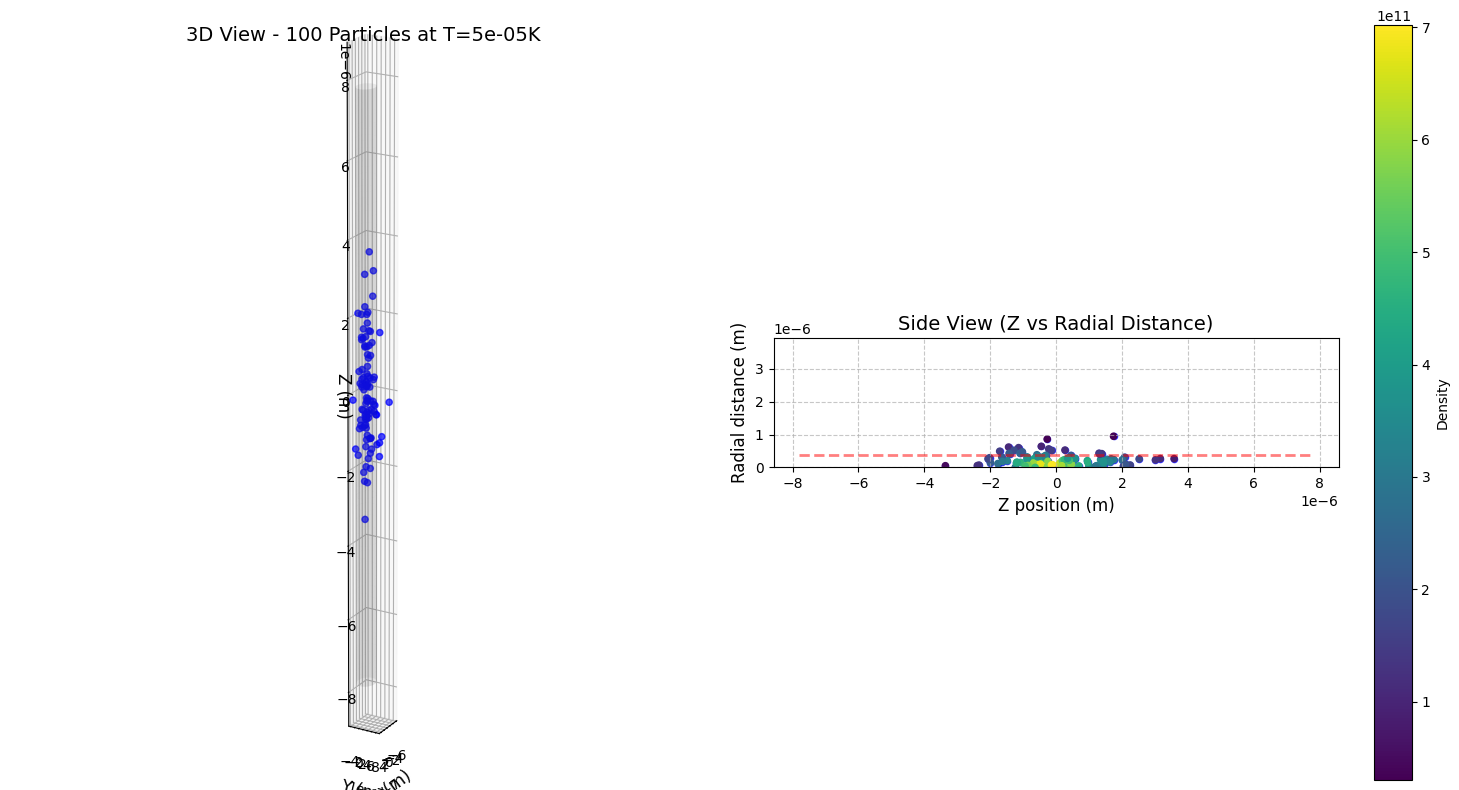

In [5]:
import matplotlib.pyplot as plt
# Create a figure with two subplots: one for 3D view and one for 2D projection
fig = plt.figure(figsize=(15, 8))
N = num_particles

length = 20 * lambda_0 *spacing_factor # cylinder length
radius = 0.5 * lambda_0 *spacing_factor # cylinder radius
# 3D plot (elongated view)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='blue', marker='o', alpha=0.7)
ax1.set_xlabel('X (m)', fontsize=12)
ax1.set_ylabel('Y (m)', fontsize=12)
ax1.set_zlabel('Z (m)', fontsize=12)
ax1.set_title(f'3D View - {N} Particles at T={T}K', fontsize=14)

# Create cylinder wireframe for 3D plot
theta = np.linspace(0, 2*np.pi, 50)
z = np.linspace(-length/2, length/2, 50)
theta_grid, z_grid = np.meshgrid(theta, z)
x_grid = radius * np.cos(theta_grid)
y_grid = radius * np.sin(theta_grid)
ax1.plot_surface(x_grid, y_grid, z_grid, alpha=0.1, color='gray')

# Adjust 3D view to better show the elongated structure
ax1.view_init(elev=20, azim=30)
# Don't force equal aspect ratio to better visualize the elongated structure
ax1.set_box_aspect([radius*2, radius*2, length])

# 2D projection plot (side view)
ax2 = fig.add_subplot(122)
ax2.scatter(positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2), c='blue', alpha=0.7, s=20)
ax2.set_xlabel('Z position (m)', fontsize=12)
ax2.set_ylabel('Radial distance (m)', fontsize=12)
ax2.set_title('Side View (Z vs Radial Distance)', fontsize=14)

# Add cylinder boundaries to 2D plot
ax2.plot([-length/2, length/2], [radius, radius], 'r--', alpha=0.5, linewidth=2)
ax2.set_xlim(-length/2*1.1, length/2*1.1)
ax2.set_ylim(0, radius*10.1)  # Only show positive radial distances
ax2.grid(True, linestyle='--', alpha=0.7)

# Add colorbar for density visualization in 2D plot
from scipy.stats import gaussian_kde
xy = np.vstack([positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2)])
z = gaussian_kde(xy)(xy)
sc = ax2.scatter(positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2), c=z, s=20, cmap='viridis')
plt.colorbar(sc, ax=ax2, label='Density')

# Ensure equal scaling for both axes in the 2D plot
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

In [6]:
np.shape(positions)

(100, 3)

In [7]:
t_list = np.linspace(0,t_max_factor/Gamma_0,num_steps//time_factor)

In [8]:
np.shape(t_list)

(400,)

In [9]:
# simulate the dynamics of the dissipative spins using TWA 
magnetizations_list, Gammas, J_matrices = compute_spin_dynamics_TWA(num_particles,
                                            Gamma_0,
                                            t_max_factor,
                                            num_steps,
                                            time_factor,
                                            omega_z,
                                            Omega_Rabi,
                                            num_simulations,
                                            dipole_moment ,
                                            listNumparticles,
                                            positions)

# psi0=qt.tensor([qt.basis(2,0) for n in range(num_particles)])   # spins all up initially

# simulate the dynamics of the dissipative spins using exact method, will not work for N larger than 10 
# result_exact = compute_spin_dynamics_exact(num_particles, omega_z,Omega_Rabi, positions, dipole_moment, omega, t_list,Gamma_0, psi0)


Simulating spin dynamics...
J matrix and Gamma matrix are computed
Gamma matrix [[38107518.88804419+0.j  9802258.05524495+0.j -1301163.30555849+0.j ...
  -6264151.35314796+0.j  6877604.70315001+0.j  6745873.36815366+0.j]
 [ 9802258.05524495+0.j 38107518.88804419+0.j 20009290.92764929+0.j ...
  -7912929.96826555+0.j -1247306.52267109+0.j  -461911.11175391+0.j]
 [-1301163.30555849+0.j 20009290.92764929+0.j 38107518.88804419+0.j ...
  -1467168.57956731+0.j -7865994.87946751+0.j -7548652.62959085+0.j]
 ...
 [-6264151.35314796+0.j -7912929.96826555+0.j -1467168.57956731+0.j ...
  38107518.88804419+0.j -5100071.29669625+0.j -5005423.78711928+0.j]
 [ 6877604.70315001+0.j -1247306.52267109+0.j -7865994.87946751+0.j ...
  -5100071.29669625+0.j 38107518.88804419+0.j 37832985.95407937+0.j]
 [ 6745873.36815366+0.j  -461911.11175391+0.j -7548652.62959085+0.j ...
  -5005423.78711928+0.j 37832985.95407937+0.j 38107518.88804419+0.j]]
J matrix [[ 0.00000000e+00+0.j  8.27074376e+06-0.j  9.32282810e+06-0

Running simulations:   0%|          | 0/5000 [00:00<?, ?it/s]/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:255: ComplexWarning: Casting complex values to real discards the imaginary part
  xi_x[i] = np.sum(nu[i, :] * noise_x)
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:256: ComplexWarning: Casting complex values to real discards the imaginary part
  xi_y[i] = np.sum(nu[i, :] * noise_y)
Running simulations: 100%|██████████| 5000/5000 [16:26:26<00:00, 11.84s/it]        

All simulations complete!


In [ ]:
result_exact = compute_spin_dynamics_exact(num_particles, omega_z,Omega_Rabi, positions, dipole_moment, omega, tlist,Gamma_0, psi0)

In [33]:
np.shape(magnetizations_list)

(1, 8000, 80, 100, 3)

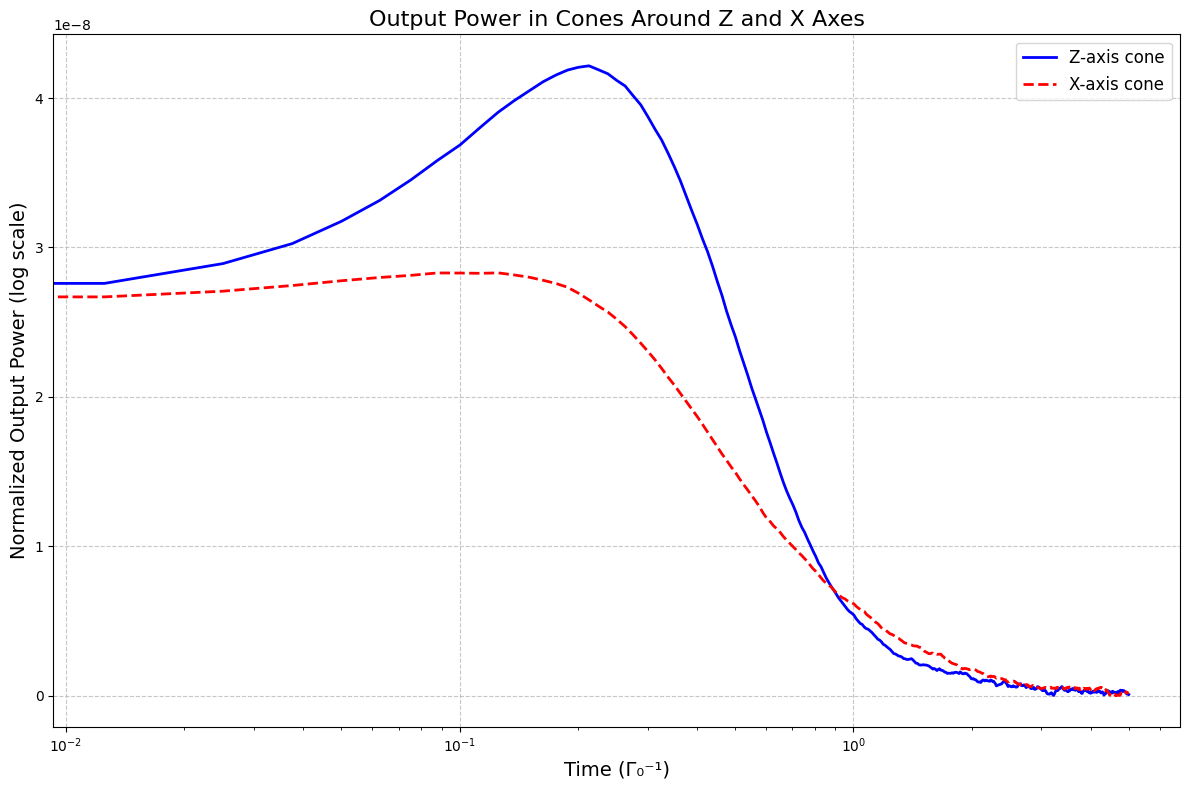

In [10]:
def OutputPower(k_vector, magnetizations, positions, t_list, num_simulations):
    """
    Calculate the output power in the direction of k_vector for each time step.
    
    Parameters:
    -----------
    k_vector : numpy.ndarray
        The wave vector direction (normalized)
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    positions : numpy.ndarray
        Array of particle positions with shape (num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    P_k : numpy.ndarray
        Output power for each time step
    """
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    # Initialize output power array
    P_k = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate spin operators
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    
    # Calculate average spin operators over all simulations
    avg_s_plus = np.mean(s_plus, axis=0)   # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0) # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)         # shape: (time_steps, num_particles)
    
    # Calculate all phases first to avoid redundant calculations
    phases = np.zeros((num_particles, num_particles))
    for i in range(num_particles):
        for j in range(num_particles):
            phases[i, j] = np.dot(k_vector, positions[i] - positions[j])
    
    # Calculate output power for each time step
    for t in range(num_time_steps):
        for i in range(num_particles):
            for j in range(num_particles):
                # Use pre-computed phase
                phase = phases[i, j]

                # Add coherent contribution
                P_k[t] += np.exp(1j*(phase)) * (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] += np.exp(1j*(phase)) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    
    return P_k,phases

# Generate k-vectors in a cone around a specified axis
def generate_k_vectors_in_cone(axis, cone_angle, num_vectors):
    """
    Generate normalized k-vectors within a cone around a specified axis.
    
    Parameters:
    -----------
    axis : numpy.ndarray
        The central axis of the cone (will be normalized)
    cone_angle : float
        The half-angle of the cone in radians
    num_vectors : int
        Number of k-vectors to generate
        
    Returns:
    --------
    k_vectors : numpy.ndarray
        Array of normalized k-vectors within the cone
    """
    # Normalize the axis
    axis = axis / np.linalg.norm(axis)
    
    k_vectors = []
    
    for _ in range(num_vectors):
        if axis[0] == 0 and axis[1] == 0 and axis[2] == 1:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to z-axis)
            x = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            z = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
        if axis[0] == 1 and axis[1] == 0 and axis[2] == 0:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to x-axis)
            z = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            x = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
    
    return np.array(k_vectors)

# Calculate output power for k-vectors in cones around z and x axes
def calculate_output_power_in_cones(magnetizations, positions, t_list, num_simulations, num_vectors_per_cone=10, cone_angle=np.pi/6):
    """
    Calculate output power for k-vectors in cones around z and x axes.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations
    positions : numpy.ndarray
        Array of particle positions
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
    num_vectors_per_cone : int
        Number of k-vectors per cone
    cone_angle : float
        Half-angle of the cone in radians
        
    Returns:
    --------
    z_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around z-axis
    x_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around x-axis
    """
    # Generate k-vectors in cones around z and x axes
    z_axis = np.array([0, 0, 1])
    x_axis = np.array([1, 0, 0])
    
    z_cone_vectors = generate_k_vectors_in_cone(z_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    x_cone_vectors = generate_k_vectors_in_cone(x_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    
    # Calculate power for each k-vector and sum within each cone
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    z_cone_power = np.zeros(num_time_steps, dtype=complex)
    x_cone_power = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate and sum powers for z-cone
    for k_vector in z_cone_vectors:
        power,phases_z = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        z_cone_power += power
    
    # Calculate and sum powers for x-cone
    for k_vector in x_cone_vectors:
        power,phases_x = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        x_cone_power += power
    
    # Normalize by number of k-vectors and num_particles*Gamma_0
    z_cone_power = z_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    x_cone_power = x_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    
    return z_cone_power, x_cone_power,phases_z,phases_x

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate output power for cones around z and x axes
    z_cone_power, x_cone_power,phases_z,phases_x = calculate_output_power_in_cones(
        magnetizations, 
        positions, 
        t_list, 
        num_simulations,
        num_vectors_per_cone=10,
        cone_angle=0.1  # 30 degrees cone
    )
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot absolute values of powers
    plt.plot(t_list * Gamma_0, np.abs(z_cone_power), 'b-', linewidth=2, label='Z-axis cone')
    plt.plot(t_list * Gamma_0, np.abs(x_cone_power), 'r--', linewidth=2, label='X-axis cone')
    # plt.xscale('log')
    plt.title('Output Power in Cones Around Z and X Axes', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('Normalized Output Power (log scale)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


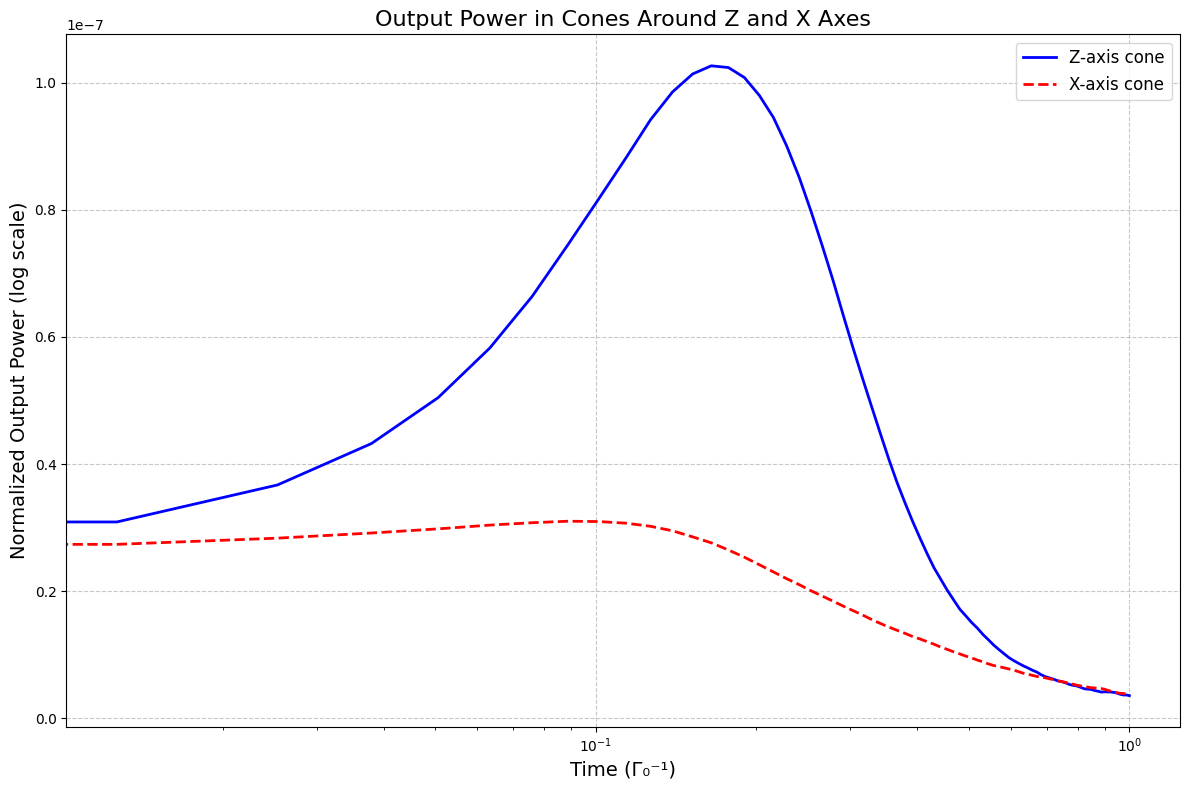

In [20]:
def OutputPower(k_vector, magnetizations, positions, t_list, num_simulations):
    """
    Calculate the output power in the direction of k_vector for each time step.
    
    Parameters:
    -----------
    k_vector : numpy.ndarray
        The wave vector direction (normalized)
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    positions : numpy.ndarray
        Array of particle positions with shape (num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    P_k : numpy.ndarray
        Output power for each time step
    """
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    # Initialize output power array
    P_k = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate spin operators
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    
    # Calculate average spin operators over all simulations
    avg_s_plus = np.mean(s_plus, axis=0)   # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0) # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)         # shape: (time_steps, num_particles)
    
    # Calculate all phases first to avoid redundant calculations
    phases = np.zeros((num_particles, num_particles))
    for i in range(num_particles):
        for j in range(num_particles):
            phases[i, j] = np.dot(k_vector, positions[i] - positions[j])
    
    # Calculate output power for each time step
    for t in range(num_time_steps):
        for i in range(num_particles):
            for j in range(num_particles):
                # Use pre-computed phase
                phase = phases[i, j]

                # Add coherent contribution
                P_k[t] += np.exp(1j*(phase)) * (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] += np.exp(1j*(phase)) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    
    return P_k,phases

# Generate k-vectors in a cone around a specified axis
def generate_k_vectors_in_cone(axis, cone_angle, num_vectors):
    """
    Generate normalized k-vectors within a cone around a specified axis.
    
    Parameters:
    -----------
    axis : numpy.ndarray
        The central axis of the cone (will be normalized)
    cone_angle : float
        The half-angle of the cone in radians
    num_vectors : int
        Number of k-vectors to generate
        
    Returns:
    --------
    k_vectors : numpy.ndarray
        Array of normalized k-vectors within the cone
    """
    # Normalize the axis
    axis = axis / np.linalg.norm(axis)
    
    k_vectors = []
    
    for _ in range(num_vectors):
        if axis[0] == 0 and axis[1] == 0 and axis[2] == 1:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to z-axis)
            x = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            z = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
        if axis[0] == 1 and axis[1] == 0 and axis[2] == 0:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to x-axis)
            z = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            x = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
    
    return np.array(k_vectors)

# Calculate output power for k-vectors in cones around z and x axes
def calculate_output_power_in_cones(magnetizations, positions, t_list, num_simulations, num_vectors_per_cone=10, cone_angle=np.pi/6):
    """
    Calculate output power for k-vectors in cones around z and x axes.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations
    positions : numpy.ndarray
        Array of particle positions
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
    num_vectors_per_cone : int
        Number of k-vectors per cone
    cone_angle : float
        Half-angle of the cone in radians
        
    Returns:
    --------
    z_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around z-axis
    x_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around x-axis
    """
    # Generate k-vectors in cones around z and x axes
    z_axis = np.array([0, 0, 1])
    x_axis = np.array([1, 0, 0])
    
    z_cone_vectors = generate_k_vectors_in_cone(z_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    x_cone_vectors = generate_k_vectors_in_cone(x_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    
    # Calculate power for each k-vector and sum within each cone
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    z_cone_power = np.zeros(num_time_steps, dtype=complex)
    x_cone_power = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate and sum powers for z-cone
    for k_vector in z_cone_vectors:
        power,phases_z = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        z_cone_power += power
    
    # Calculate and sum powers for x-cone
    for k_vector in x_cone_vectors:
        power,phases_x = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        x_cone_power += power
    
    # Normalize by number of k-vectors and num_particles*Gamma_0
    z_cone_power = z_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    x_cone_power = x_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    
    return z_cone_power, x_cone_power,phases_z,phases_x

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate output power for cones around z and x axes
    z_cone_power, x_cone_power,phases_z,phases_x = calculate_output_power_in_cones(
        magnetizations, 
        positions, 
        t_list, 
        num_simulations,
        num_vectors_per_cone=10,
        cone_angle=0.1  # 30 degrees cone
    )
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot absolute values of powers
    plt.plot(t_list * Gamma_0, np.abs(z_cone_power), 'b-', linewidth=2, label='Z-axis cone')
    plt.plot(t_list * Gamma_0, np.abs(x_cone_power), 'r--', linewidth=2, label='X-axis cone')
    plt.xscale('log')
    plt.title('Output Power in Cones Around Z and X Axes', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('Normalized Output Power (log scale)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_89195/1582403868.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
  g2[t] = numerator / denominator if denominator != 0 else np.nan


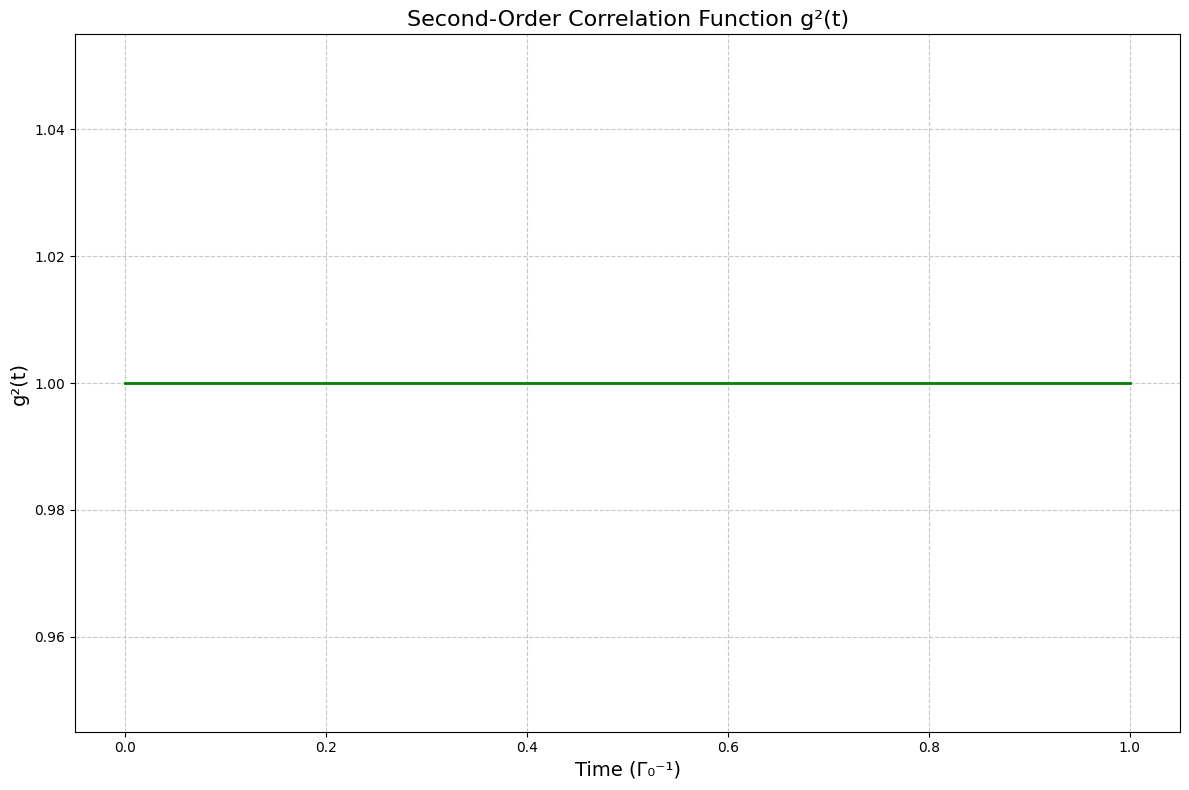

In [23]:
def calculate_g2(magnetizations, t_list, num_simulations):
    """
    Calculate the second-order correlation function g2(t) from magnetization data.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    g2 : numpy.ndarray
        Second-order correlation function for each time step
    """
    num_time_steps = len(t_list)
    num_particles = magnetizations.shape[2]
    
    # Calculate spin operators
    s_plus = 0.5 * (magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])
    s_minus = 0.5 * (magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])
    
    # Initialize array for g2
    g2 = np.zeros(num_time_steps)
    
    # For each time step
    for t in range(num_time_steps):
        # Initialize numerator and denominator for g2 calculation
        numerator = 0.0
        denominator = 0.0
        
        # For each simulation (trajectory)
        for n in range(num_simulations):
            # Calculate collective operators for k mode

            S_k_plus = np.sum(s_plus[n, t, :])
            S_k_minus = np.sum(s_minus[n, t, :])

            # Calculate collective operators for l mode (same as k in this case)
            
            S_l_plus = S_k_plus
            S_l_minus = S_k_minus
            
            # Calculate terms for g2
            intensity_k = S_k_plus * S_k_minus
            intensity_l = S_l_plus * S_l_minus
            
            # Add to numerator: <S_k^+ S_k^- S_l^+ S_l^->
            denominator += S_k_plus * S_l_plus * S_l_minus * S_k_minus
            
            # Add to denominator: <S_k^+ S_k^-><S_l^+ S_l^->
            numerator += intensity_k * intensity_l
        
        # Calculate g2 according to the formula
        g2[t] = numerator / denominator if denominator != 0 else np.nan
    
    return g2

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate g2(t)
    g2 = calculate_g2(magnetizations, t_list, num_simulations)
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.plot(t_list * Gamma_0, g2, 'g-', linewidth=2)
    # plt.xscale('log')
    plt.title('Second-Order Correlation Function g²(t)', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('g²(t)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


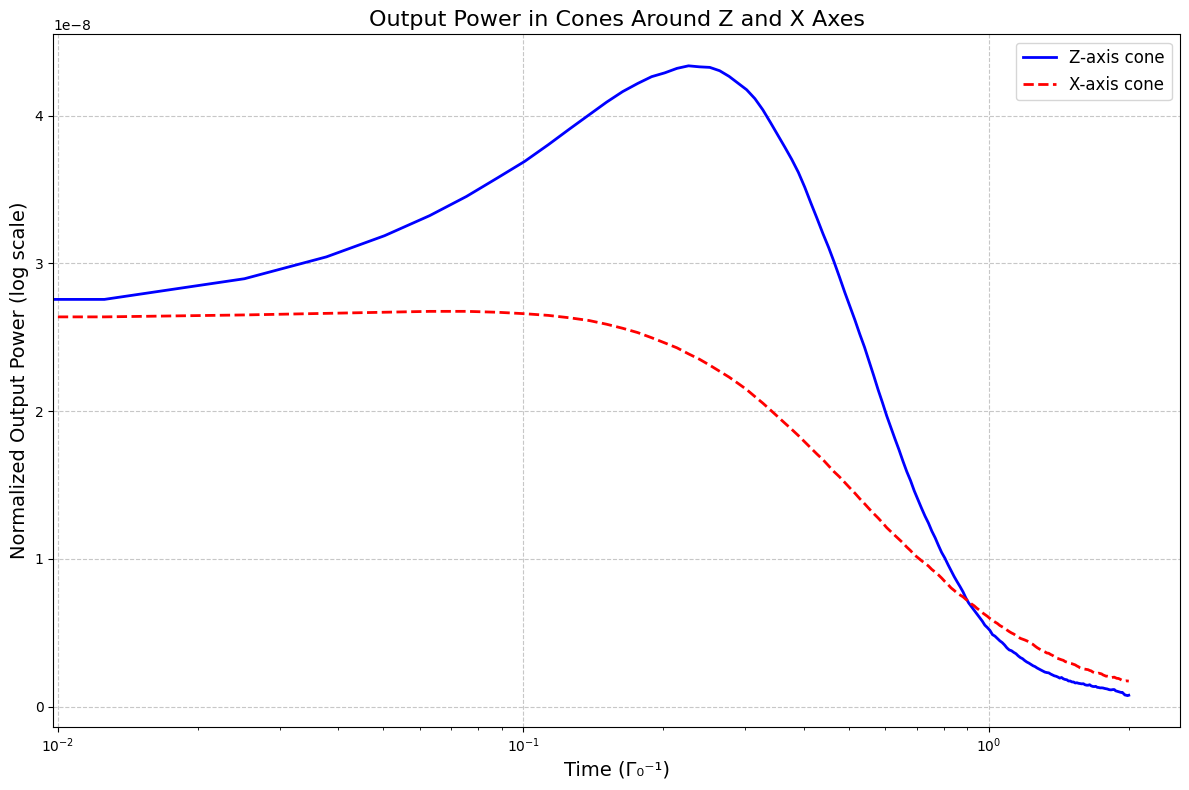

In [10]:
def OutputPower(k_vector, magnetizations, positions, t_list, num_simulations):
    """
    Calculate the output power in the direction of k_vector for each time step.
    
    Parameters:
    -----------
    k_vector : numpy.ndarray
        The wave vector direction (normalized)
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    positions : numpy.ndarray
        Array of particle positions with shape (num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    P_k : numpy.ndarray
        Output power for each time step
    """
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    # Initialize output power array
    P_k = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate spin operators
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    
    # Calculate average spin operators over all simulations
    avg_s_plus = np.mean(s_plus, axis=0)   # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0) # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)         # shape: (time_steps, num_particles)
    
    # Calculate all phases first to avoid redundant calculations
    phases = np.zeros((num_particles, num_particles))
    for i in range(num_particles):
        for j in range(num_particles):
            phases[i, j] = np.dot(k_vector, positions[i] - positions[j])
    
    # Calculate output power for each time step
    for t in range(num_time_steps):
        for i in range(num_particles):
            for j in range(num_particles):
                # Use pre-computed phase
                phase = phases[i, j]

                # Add coherent contribution
                P_k[t] += np.exp(1j*(phase)) * (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] += np.exp(1j*(phase)) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    
    return P_k,phases

# Generate k-vectors in a cone around a specified axis
def generate_k_vectors_in_cone(axis, cone_angle, num_vectors):
    """
    Generate normalized k-vectors within a cone around a specified axis.
    
    Parameters:
    -----------
    axis : numpy.ndarray
        The central axis of the cone (will be normalized)
    cone_angle : float
        The half-angle of the cone in radians
    num_vectors : int
        Number of k-vectors to generate
        
    Returns:
    --------
    k_vectors : numpy.ndarray
        Array of normalized k-vectors within the cone
    """
    # Normalize the axis
    axis = axis / np.linalg.norm(axis)
    
    k_vectors = []
    
    for _ in range(num_vectors):
        if axis[0] == 0 and axis[1] == 0 and axis[2] == 1:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to z-axis)
            x = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            z = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
        if axis[0] == 1 and axis[1] == 0 and axis[2] == 0:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to x-axis)
            z = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            x = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
    
    return np.array(k_vectors)

# Calculate output power for k-vectors in cones around z and x axes
def calculate_output_power_in_cones(magnetizations, positions, t_list, num_simulations, num_vectors_per_cone=10, cone_angle=np.pi/6):
    """
    Calculate output power for k-vectors in cones around z and x axes.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations
    positions : numpy.ndarray
        Array of particle positions
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
    num_vectors_per_cone : int
        Number of k-vectors per cone
    cone_angle : float
        Half-angle of the cone in radians
        
    Returns:
    --------
    z_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around z-axis
    x_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around x-axis
    """
    # Generate k-vectors in cones around z and x axes
    z_axis = np.array([0, 0, 1])
    x_axis = np.array([1, 0, 0])
    
    z_cone_vectors = generate_k_vectors_in_cone(z_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    x_cone_vectors = generate_k_vectors_in_cone(x_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    
    # Calculate power for each k-vector and sum within each cone
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    z_cone_power = np.zeros(num_time_steps, dtype=complex)
    x_cone_power = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate and sum powers for z-cone
    for k_vector in z_cone_vectors:
        power,phases_z = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        z_cone_power += power
    
    # Calculate and sum powers for x-cone
    for k_vector in x_cone_vectors:
        power,phases_x = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        x_cone_power += power
    
    # Normalize by number of k-vectors and num_particles*Gamma_0
    z_cone_power = z_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    x_cone_power = x_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    
    return z_cone_power, x_cone_power,phases_z,phases_x

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate output power for cones around z and x axes
    z_cone_power, x_cone_power,phases_z,phases_x = calculate_output_power_in_cones(
        magnetizations, 
        positions, 
        t_list, 
        num_simulations,
        num_vectors_per_cone=10,
        cone_angle=0.1  # 30 degrees cone
    )
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot absolute values of powers
    plt.plot(t_list * Gamma_0, np.abs(z_cone_power), 'b-', linewidth=2, label='Z-axis cone')
    plt.plot(t_list * Gamma_0, np.abs(x_cone_power), 'r--', linewidth=2, label='X-axis cone')
    plt.xscale('log')
    plt.title('Output Power in Cones Around Z and X Axes', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('Normalized Output Power (log scale)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_83897/1995981287.py:30: RuntimeWarning: invalid value encountered in multiply
  s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_83897/1995981287.py:31: RuntimeWarning: invalid value encountered in multiply
  s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms


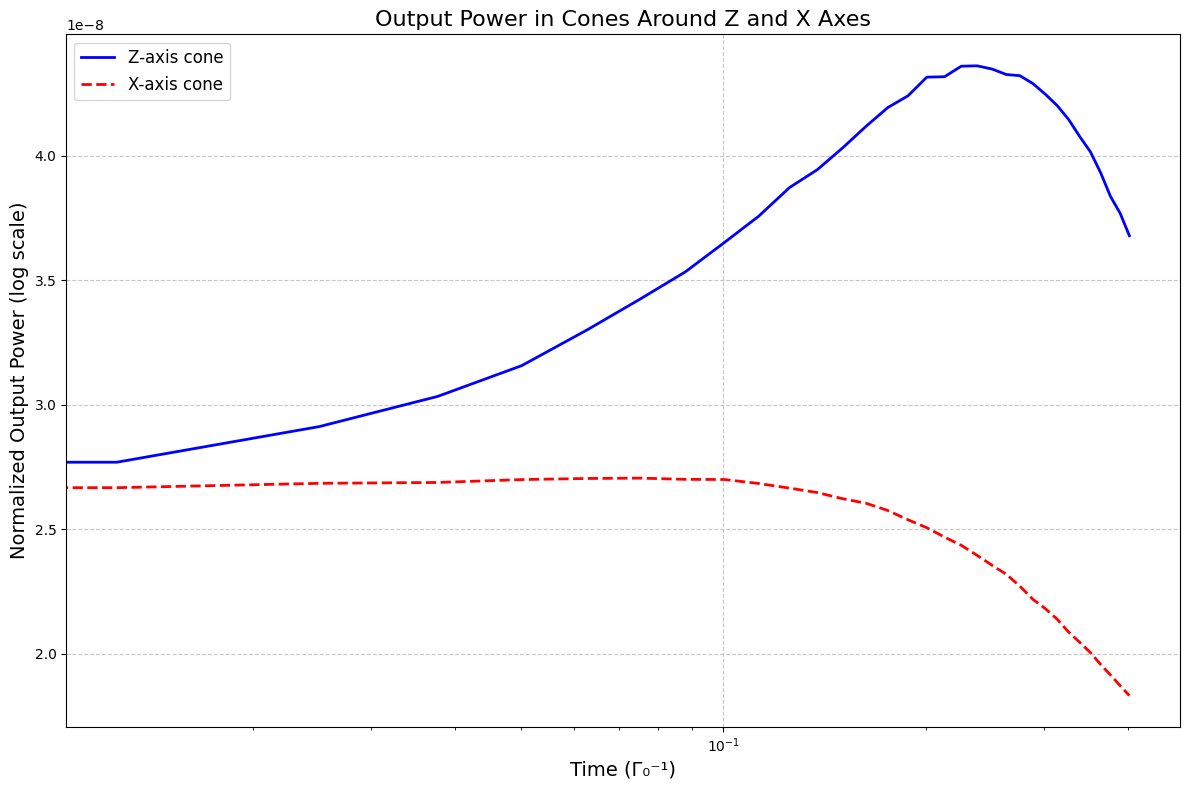

In [12]:
def OutputPower(k_vector, magnetizations, positions, t_list, num_simulations):
    """
    Calculate the output power in the direction of k_vector for each time step.
    
    Parameters:
    -----------
    k_vector : numpy.ndarray
        The wave vector direction (normalized)
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    positions : numpy.ndarray
        Array of particle positions with shape (num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    P_k : numpy.ndarray
        Output power for each time step
    """
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    # Initialize output power array
    P_k = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate spin operators
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    
    # Calculate average spin operators over all simulations
    avg_s_plus = np.mean(s_plus, axis=0)   # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0) # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)         # shape: (time_steps, num_particles)
    
    # Calculate all phases first to avoid redundant calculations
    phases = np.zeros((num_particles, num_particles))
    for i in range(num_particles):
        for j in range(num_particles):
            phases[i, j] = np.dot(k_vector, positions[i] - positions[j])
    
    # Calculate output power for each time step
    for t in range(num_time_steps):
        for i in range(num_particles):
            for j in range(num_particles):
                # Use pre-computed phase
                phase = phases[i, j]

                # Add coherent contribution
                P_k[t] += np.exp(1j*(phase)) * (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] += np.exp(1j*(phase)) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    
    return P_k,phases

# Generate k-vectors in a cone around a specified axis
def generate_k_vectors_in_cone(axis, cone_angle, num_vectors):
    """
    Generate normalized k-vectors within a cone around a specified axis.
    
    Parameters:
    -----------
    axis : numpy.ndarray
        The central axis of the cone (will be normalized)
    cone_angle : float
        The half-angle of the cone in radians
    num_vectors : int
        Number of k-vectors to generate
        
    Returns:
    --------
    k_vectors : numpy.ndarray
        Array of normalized k-vectors within the cone
    """
    # Normalize the axis
    axis = axis / np.linalg.norm(axis)
    
    k_vectors = []
    
    for _ in range(num_vectors):
        if axis[0] == 0 and axis[1] == 0 and axis[2] == 1:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to z-axis)
            x = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            z = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
        if axis[0] == 1 and axis[1] == 0 and axis[2] == 0:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to x-axis)
            z = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            x = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
    
    return np.array(k_vectors)

# Calculate output power for k-vectors in cones around z and x axes
def calculate_output_power_in_cones(magnetizations, positions, t_list, num_simulations, num_vectors_per_cone=10, cone_angle=np.pi/6):
    """
    Calculate output power for k-vectors in cones around z and x axes.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations
    positions : numpy.ndarray
        Array of particle positions
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
    num_vectors_per_cone : int
        Number of k-vectors per cone
    cone_angle : float
        Half-angle of the cone in radians
        
    Returns:
    --------
    z_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around z-axis
    x_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around x-axis
    """
    # Generate k-vectors in cones around z and x axes
    z_axis = np.array([0, 0, 1])
    x_axis = np.array([1, 0, 0])
    
    z_cone_vectors = generate_k_vectors_in_cone(z_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    x_cone_vectors = generate_k_vectors_in_cone(x_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    
    # Calculate power for each k-vector and sum within each cone
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    z_cone_power = np.zeros(num_time_steps, dtype=complex)
    x_cone_power = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate and sum powers for z-cone
    for k_vector in z_cone_vectors:
        power,phases_z = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        z_cone_power += power
    
    # Calculate and sum powers for x-cone
    for k_vector in x_cone_vectors:
        power,phases_x = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        x_cone_power += power
    
    # Normalize by number of k-vectors and num_particles*Gamma_0
    z_cone_power = z_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    x_cone_power = x_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    
    return z_cone_power, x_cone_power,phases_z,phases_x

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate output power for cones around z and x axes
    z_cone_power, x_cone_power,phases_z,phases_x = calculate_output_power_in_cones(
        magnetizations, 
        positions, 
        t_list, 
        num_simulations,
        num_vectors_per_cone=10,
        cone_angle=0.1  # 30 degrees cone
    )
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot absolute values of powers
    plt.plot(t_list * Gamma_0, np.abs(z_cone_power), 'b-', linewidth=2, label='Z-axis cone')
    plt.plot(t_list * Gamma_0, np.abs(x_cone_power), 'r--', linewidth=2, label='X-axis cone')
    plt.xscale('log')
    plt.title('Output Power in Cones Around Z and X Axes', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('Normalized Output Power (log scale)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
np.shape()

In [6]:
def OutputPower(k_vector, magnetizations, positions, t_list, num_simulations):
    """
    Calculate the output power in the direction of k_vector for each time step.
    
    Parameters:
    -----------
    k_vector : numpy.ndarray
        The wave vector direction (normalized)
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    positions : numpy.ndarray
        Array of particle positions with shape (num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    P_k : numpy.ndarray
        Output power for each time step
    """
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    # Initialize output power array
    P_k = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate spin operators
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    
    # Calculate average spin operators over all simulations
    avg_s_plus = np.mean(s_plus, axis=0)   # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0) # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)         # shape: (time_steps, num_particles)
    
    # Calculate all phases first to avoid redundant calculations
    phases = np.zeros((num_particles, num_particles))
    for i in range(num_particles):
        for j in range(num_particles):
            phases[i, j] = np.dot(k_vector, positions[i] - positions[j])
    
    # Calculate output power for each time step
    for t in range(num_time_steps):
        for i in range(num_particles):
            for j in range(num_particles):
                # Use pre-computed phase
                phase = phases[i, j]

                # Add coherent contribution
                P_k[t] += np.exp(1j*(phase)) * (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] += np.exp(1j*(phase)) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    
    return P_k,phases

# Generate k-vectors in a cone around a specified axis
def generate_k_vectors_in_cone(axis, cone_angle, num_vectors):
    """
    Generate normalized k-vectors within a cone around a specified axis.
    
    Parameters:
    -----------
    axis : numpy.ndarray
        The central axis of the cone (will be normalized)
    cone_angle : float
        The half-angle of the cone in radians
    num_vectors : int
        Number of k-vectors to generate
        
    Returns:
    --------
    k_vectors : numpy.ndarray
        Array of normalized k-vectors within the cone
    """
    # Normalize the axis
    axis = axis / np.linalg.norm(axis)
    
    k_vectors = []
    
    for _ in range(num_vectors):
        if axis[0] == 0 and axis[1] == 0 and axis[2] == 1:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to z-axis)
            x = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            z = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
        if axis[0] == 1 and axis[1] == 0 and axis[2] == 0:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to x-axis)
            z = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            x = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
    
    return np.array(k_vectors)

# Calculate output power for k-vectors in cones around z and x axes
def calculate_output_power_in_cones(magnetizations, positions, t_list, num_simulations, num_vectors_per_cone=10, cone_angle=np.pi/6):
    """
    Calculate output power for k-vectors in cones around z and x axes.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations
    positions : numpy.ndarray
        Array of particle positions
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
    num_vectors_per_cone : int
        Number of k-vectors per cone
    cone_angle : float
        Half-angle of the cone in radians
        
    Returns:
    --------
    z_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around z-axis
    x_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around x-axis
    """
    # Generate k-vectors in cones around z and x axes
    z_axis = np.array([0, 0, 1])
    x_axis = np.array([1, 0, 0])
    
    z_cone_vectors = generate_k_vectors_in_cone(z_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    x_cone_vectors = generate_k_vectors_in_cone(x_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    
    # Calculate power for each k-vector and sum within each cone
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    z_cone_power = np.zeros(num_time_steps, dtype=complex)
    x_cone_power = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate and sum powers for z-cone
    for k_vector in z_cone_vectors:
        power,phases_z = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        z_cone_power += power
    
    # Calculate and sum powers for x-cone
    for k_vector in x_cone_vectors:
        power,phases_x = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        x_cone_power += power
    
    # Normalize by number of k-vectors and num_particles*Gamma_0
    z_cone_power = z_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    x_cone_power = x_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    
    return z_cone_power, x_cone_power,phases_z,phases_x

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate output power for cones around z and x axes
    z_cone_power, x_cone_power,phases_z,phases_x = calculate_output_power_in_cones(
        magnetizations, 
        positions, 
        t_list, 
        num_simulations,
        num_vectors_per_cone=10,
        cone_angle=0.1  # 30 degrees cone
    )
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot absolute values of powers
    plt.plot(t_list * Gamma_0, np.abs(z_cone_power), 'b-', linewidth=2, label='Z-axis cone')
    plt.plot(t_list * Gamma_0, np.abs(x_cone_power), 'r--', linewidth=2, label='X-axis cone')
    plt.yscale('log')
    plt.title('Output Power in Cones Around Z and X Axes', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('Normalized Output Power (log scale)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_83897/2825207146.py:30: RuntimeWarning: invalid value encountered in multiply
  s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_83897/2825207146.py:31: RuntimeWarning: invalid value encountered in multiply
  s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms


IndexError: index 240 is out of bounds for axis 1 with size 240

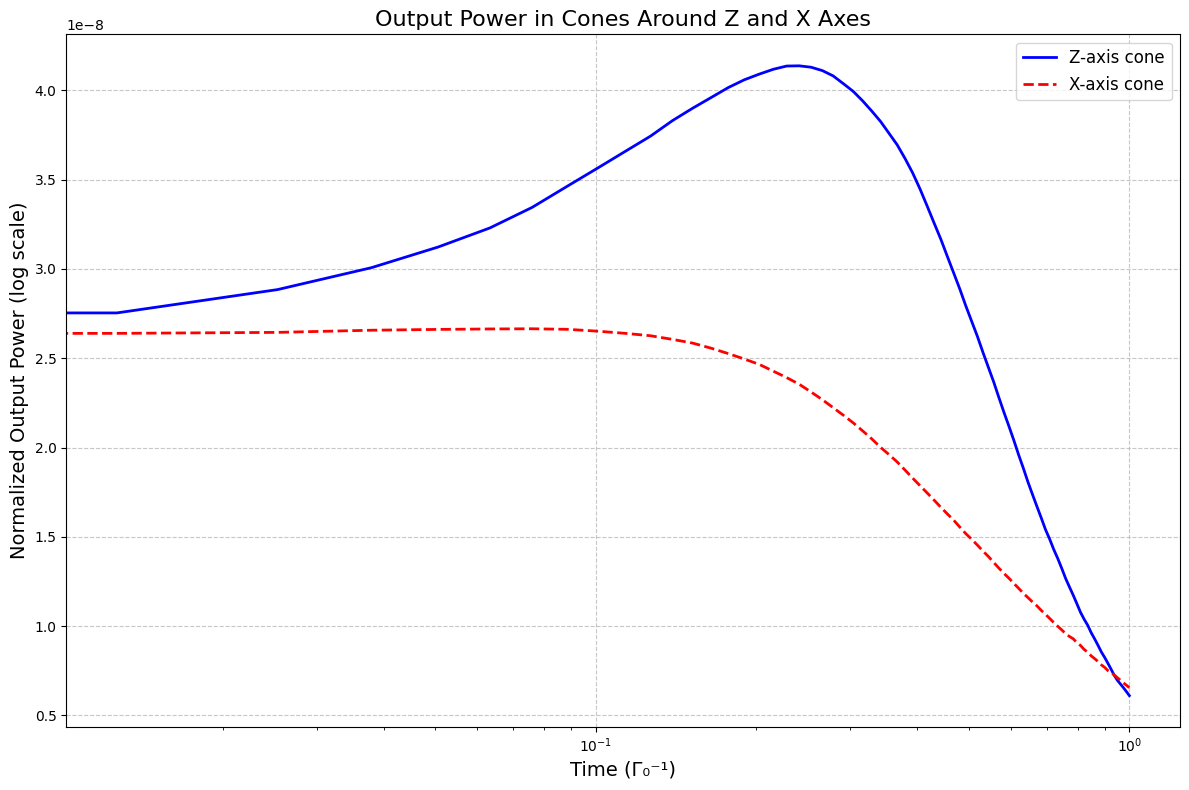

In [7]:
def OutputPower(k_vector, magnetizations, positions, t_list, num_simulations):
    """
    Calculate the output power in the direction of k_vector for each time step.
    
    Parameters:
    -----------
    k_vector : numpy.ndarray
        The wave vector direction (normalized)
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    positions : numpy.ndarray
        Array of particle positions with shape (num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    P_k : numpy.ndarray
        Output power for each time step
    """
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    # Initialize output power array
    P_k = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate spin operators
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    
    # Calculate average spin operators over all simulations
    avg_s_plus = np.mean(s_plus, axis=0)   # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0) # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)         # shape: (time_steps, num_particles)
    
    # Calculate all phases first to avoid redundant calculations
    phases = np.zeros((num_particles, num_particles))
    for i in range(num_particles):
        for j in range(num_particles):
            phases[i, j] = np.dot(k_vector, positions[i] - positions[j])
    
    # Calculate output power for each time step
    for t in range(num_time_steps):
        for i in range(num_particles):
            for j in range(num_particles):
                # Use pre-computed phase
                phase = phases[i, j]

                # Add coherent contribution
                P_k[t] += np.exp(1j*(phase)) * (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] += np.exp(1j*(phase)) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    
    return P_k,phases

# Generate k-vectors in a cone around a specified axis
def generate_k_vectors_in_cone(axis, cone_angle, num_vectors):
    """
    Generate normalized k-vectors within a cone around a specified axis.
    
    Parameters:
    -----------
    axis : numpy.ndarray
        The central axis of the cone (will be normalized)
    cone_angle : float
        The half-angle of the cone in radians
    num_vectors : int
        Number of k-vectors to generate
        
    Returns:
    --------
    k_vectors : numpy.ndarray
        Array of normalized k-vectors within the cone
    """
    # Normalize the axis
    axis = axis / np.linalg.norm(axis)
    
    k_vectors = []
    
    for _ in range(num_vectors):
        if axis[0] == 0 and axis[1] == 0 and axis[2] == 1:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to z-axis)
            x = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            z = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
        if axis[0] == 1 and axis[1] == 0 and axis[2] == 0:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to x-axis)
            z = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            x = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
    
    return np.array(k_vectors)

# Calculate output power for k-vectors in cones around z and x axes
def calculate_output_power_in_cones(magnetizations, positions, t_list, num_simulations, num_vectors_per_cone=10, cone_angle=np.pi/6):
    """
    Calculate output power for k-vectors in cones around z and x axes.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations
    positions : numpy.ndarray
        Array of particle positions
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
    num_vectors_per_cone : int
        Number of k-vectors per cone
    cone_angle : float
        Half-angle of the cone in radians
        
    Returns:
    --------
    z_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around z-axis
    x_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around x-axis
    """
    # Generate k-vectors in cones around z and x axes
    z_axis = np.array([0, 0, 1])
    x_axis = np.array([1, 0, 0])
    
    z_cone_vectors = generate_k_vectors_in_cone(z_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    x_cone_vectors = generate_k_vectors_in_cone(x_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    
    # Calculate power for each k-vector and sum within each cone
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    z_cone_power = np.zeros(num_time_steps, dtype=complex)
    x_cone_power = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate and sum powers for z-cone
    for k_vector in z_cone_vectors:
        power,phases_z = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        z_cone_power += power
    
    # Calculate and sum powers for x-cone
    for k_vector in x_cone_vectors:
        power,phases_x = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        x_cone_power += power
    
    # Normalize by number of k-vectors and num_particles*Gamma_0
    z_cone_power = z_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    x_cone_power = x_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    
    return z_cone_power, x_cone_power,phases_z,phases_x

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate output power for cones around z and x axes
    z_cone_power, x_cone_power,phases_z,phases_x = calculate_output_power_in_cones(
        magnetizations, 
        positions, 
        t_list, 
        num_simulations,
        num_vectors_per_cone=10,
        cone_angle=0.1  # 30 degrees cone
    )
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot absolute values of powers
    plt.plot(t_list * Gamma_0, np.abs(z_cone_power), 'b-', linewidth=2, label='Z-axis cone')
    plt.plot(t_list * Gamma_0, np.abs(x_cone_power), 'r--', linewidth=2, label='X-axis cone')
    plt.xscale('log')
    plt.title('Output Power in Cones Around Z and X Axes', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('Normalized Output Power (log scale)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [12]:
magnetizations

array([[[[-1.,  1.,  1.],
         [ 1., -1.,  1.],
         [-1., -1.,  1.],
         ...,
         [-1.,  1.,  1.],
         [-1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        ...,

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan],
         ...,
         [nan, nan, nan],
        

In [8]:
def OutputPower(k_vector, magnetizations, positions, t_list, num_simulations):
    """
    Calculate the output power in the direction of k_vector for each time step.
    
    Parameters:
    -----------
    k_vector : numpy.ndarray
        The wave vector direction (normalized)
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    positions : numpy.ndarray
        Array of particle positions with shape (num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    P_k : numpy.ndarray
        Output power for each time step
    """
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    # Initialize output power array
    P_k = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate spin operators
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    
    # Calculate average spin operators over all simulations
    avg_s_plus = np.mean(s_plus, axis=0)   # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0) # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)         # shape: (time_steps, num_particles)
    
    # Calculate all phases first to avoid redundant calculations
    phases = np.zeros((num_particles, num_particles))
    for i in range(num_particles):
        for j in range(num_particles):
            phases[i, j] = np.dot(k_vector, positions[i] - positions[j])
    
    # Calculate output power for each time step
    for t in range(num_time_steps):
        for i in range(num_particles):
            for j in range(num_particles):
                # Use pre-computed phase
                phase = phases[i, j]

                # Add coherent contribution
                P_k[t] += np.exp(1j*(phase)) * (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] += np.exp(1j*(phase)) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    
    return P_k,phases

# Generate k-vectors in a cone around a specified axis
def generate_k_vectors_in_cone(axis, cone_angle, num_vectors):
    """
    Generate normalized k-vectors within a cone around a specified axis.
    
    Parameters:
    -----------
    axis : numpy.ndarray
        The central axis of the cone (will be normalized)
    cone_angle : float
        The half-angle of the cone in radians
    num_vectors : int
        Number of k-vectors to generate
        
    Returns:
    --------
    k_vectors : numpy.ndarray
        Array of normalized k-vectors within the cone
    """
    # Normalize the axis
    axis = axis / np.linalg.norm(axis)
    
    k_vectors = []
    
    for _ in range(num_vectors):
        if axis[0] == 0 and axis[1] == 0 and axis[2] == 1:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to z-axis)
            x = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            z = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
        if axis[0] == 1 and axis[1] == 0 and axis[2] == 0:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to x-axis)
            z = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            x = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
    
    return np.array(k_vectors)

# Calculate output power for k-vectors in cones around z and x axes
def calculate_output_power_in_cones(magnetizations, positions, t_list, num_simulations, num_vectors_per_cone=10, cone_angle=np.pi/6):
    """
    Calculate output power for k-vectors in cones around z and x axes.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations
    positions : numpy.ndarray
        Array of particle positions
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
    num_vectors_per_cone : int
        Number of k-vectors per cone
    cone_angle : float
        Half-angle of the cone in radians
        
    Returns:
    --------
    z_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around z-axis
    x_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around x-axis
    """
    # Generate k-vectors in cones around z and x axes
    z_axis = np.array([0, 0, 1])
    x_axis = np.array([1, 0, 0])
    
    z_cone_vectors = generate_k_vectors_in_cone(z_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    x_cone_vectors = generate_k_vectors_in_cone(x_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    
    # Calculate power for each k-vector and sum within each cone
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    z_cone_power = np.zeros(num_time_steps, dtype=complex)
    x_cone_power = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate and sum powers for z-cone
    for k_vector in z_cone_vectors:
        power,phases_z = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        z_cone_power += power
    
    # Calculate and sum powers for x-cone
    for k_vector in x_cone_vectors:
        power,phases_x = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        x_cone_power += power
    
    # Normalize by number of k-vectors and num_particles*Gamma_0
    z_cone_power = z_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    x_cone_power = x_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    
    return z_cone_power, x_cone_power,phases_z,phases_x

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate output power for cones around z and x axes
    z_cone_power, x_cone_power,phases_z,phases_x = calculate_output_power_in_cones(
        magnetizations, 
        positions, 
        t_list, 
        num_simulations,
        num_vectors_per_cone=10,
        cone_angle=0.1  # 30 degrees cone
    )
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot absolute values of powers
    plt.plot(t_list * Gamma_0, np.abs(z_cone_power), 'b-', linewidth=2, label='Z-axis cone')
    plt.plot(t_list * Gamma_0, np.abs(x_cone_power), 'r--', linewidth=2, label='X-axis cone')
    plt.xscale('log')
    plt.title('Output Power in Cones Around Z and X Axes', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('Normalized Output Power (log scale)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


IndexError: index 80 is out of bounds for axis 1 with size 80

In [65]:
phases_z

array([[ 0.00000000e+00,  1.62839336e-06,  2.13638100e-06, ...,
         7.73537027e-07,  2.06644754e-06,  2.22860826e-06],
       [-1.62839336e-06,  0.00000000e+00,  5.07987637e-07, ...,
        -8.54856334e-07,  4.38054175e-07,  6.00214904e-07],
       [-2.13638100e-06, -5.07987637e-07,  0.00000000e+00, ...,
        -1.36284397e-06, -6.99334619e-08,  9.22272675e-08],
       ...,
       [-7.73537027e-07,  8.54856334e-07,  1.36284397e-06, ...,
         0.00000000e+00,  1.29291051e-06,  1.45507124e-06],
       [-2.06644754e-06, -4.38054175e-07,  6.99334619e-08, ...,
        -1.29291051e-06,  0.00000000e+00,  1.62160729e-07],
       [-2.22860826e-06, -6.00214904e-07, -9.22272675e-08, ...,
        -1.45507124e-06, -1.62160729e-07,  0.00000000e+00]])

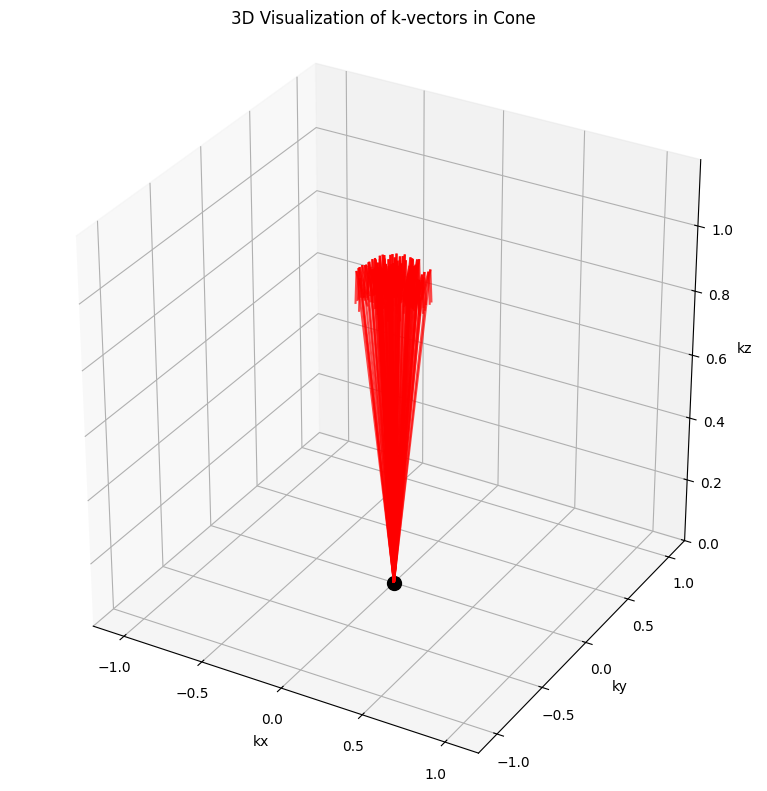

In [60]:
# Create a 3D plot of the k-vectors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
k_vectors = generate_k_vectors_in_cone([0,0,1], 0.2, 100)
# Create a new figure with 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z components from k_vectors
x = k_vectors[:, 0]
y = k_vectors[:, 1]
z = k_vectors[:, 2]

# Plot the k-vectors as arrows
for i in range(len(k_vectors)):
    ax.quiver(0, 0, 0, x[i], y[i], z[i], color='r', alpha=0.7, 
              arrow_length_ratio=0.1, linewidth=1.5)

# Set labels and title
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('3D Visualization of k-vectors in Cone')

# Set equal aspect ratio for all axes
ax.set_box_aspect([1, 1, 1])

# Add a point at the origin
ax.scatter(0, 0, 0, c='k', marker='o', s=100)

# Set axis limits to make arrows more visible
max_val = np.max(np.abs(k_vectors)) * 1.2
ax.set_xlim([-max_val, max_val])
ax.set_ylim([-max_val, max_val])
ax.set_zlim([0, max_val])

plt.tight_layout()
plt.show()


In [39]:
positions

array([[-1.17375982e-07, -2.58148591e-08,  8.49231930e-07],
       [ 7.32851875e-08, -3.13563816e-08, -7.90618150e-07],
       [ 1.46306601e-08, -8.82680145e-08, -1.30399632e-06],
       [ 2.27137743e-09,  1.73385835e-09,  1.51973732e-06],
       [ 4.51201014e-08, -1.81532904e-08, -7.68950947e-07],
       [ 7.78519420e-08, -1.38613286e-07, -1.01654793e-06],
       [ 4.06987708e-08,  8.71514155e-08, -3.55825078e-07],
       [-3.84232623e-08,  9.67911329e-09,  1.51249279e-06],
       [-9.30209557e-09, -2.37040953e-08, -1.50217710e-06],
       [-1.37599599e-08,  5.94960387e-08, -2.70733502e-06],
       [-3.37774316e-08, -1.46831821e-08, -2.44459804e-06],
       [ 9.38326037e-08, -4.51699171e-08,  1.29174364e-06],
       [-6.12276225e-08, -6.79155539e-08,  2.17194573e-06],
       [-1.73120560e-08, -6.56338293e-10, -1.97434204e-06],
       [-1.57983945e-08, -5.61248738e-08,  6.11730906e-08],
       [-1.92863737e-08,  5.00036827e-08,  2.25937882e-06],
       [ 1.73161969e-08,  1.30215581e-08

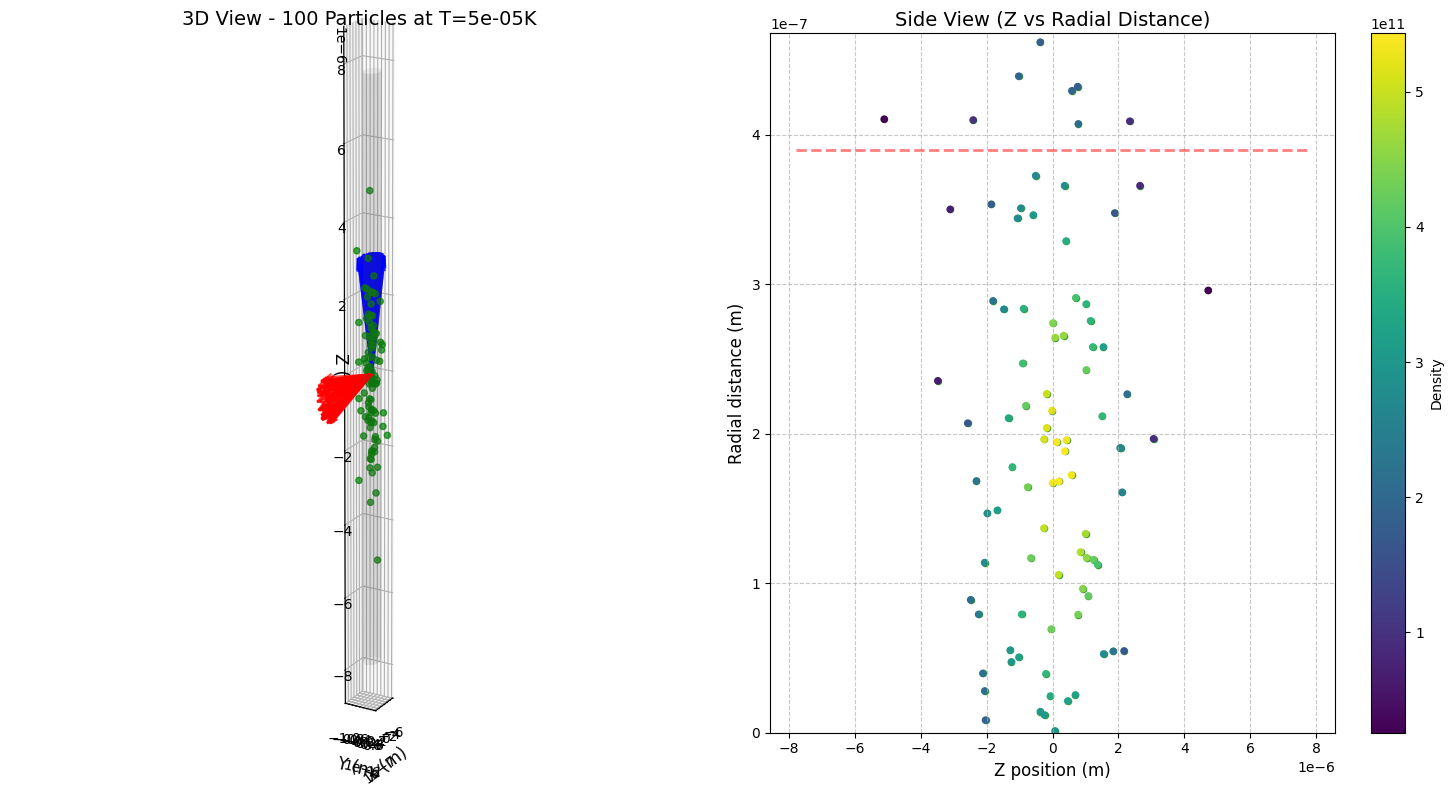

In [8]:
import matplotlib.pyplot as plt
# Create a figure with two subplots: one for 3D view and one for 2D projection
fig = plt.figure(figsize=(15, 8))
N = num_particles

length = 20 * lambda_0 *spacing_factor # cylinder length
radius = 0.5 * lambda_0 *spacing_factor # cylinder radius
# 3D plot (elongated view)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='green', marker='o', alpha=0.7)
ax1.set_xlabel('X (m)', fontsize=12)
ax1.set_ylabel('Y (m)', fontsize=12)
ax1.set_zlabel('Z (m)', fontsize=12)
ax1.set_title(f'3D View - {N} Particles at T={T}K', fontsize=14)

# Create cylinder wireframe for 3D plot
theta = np.linspace(0, 2*np.pi, 50)
z = np.linspace(-length/2, length/2, 50)
theta_grid, z_grid = np.meshgrid(theta, z)
x_grid = radius * np.cos(theta_grid)
y_grid = radius * np.sin(theta_grid)
ax1.plot_surface(x_grid, y_grid, z_grid, alpha=0.1, color='gray')

k_vectors = generate_k_vectors_in_cone([0,0,1], 0.2, 100)

# Add k_vectors as arrows
for k_vec in k_vectors:
    # Scale the arrows to be visible
    scale_factor = length / 5
    # Start arrows from origin
    ax1.quiver(0, 0, 0, 
               k_vec[0] * scale_factor, 
               k_vec[1] * scale_factor, 
               k_vec[2] * scale_factor,
               color='blue', alpha=0.7, arrow_length_ratio=0.1)


k_vectors = generate_k_vectors_in_cone([1,0,0], 0.2, 100)

# Add k_vectors as arrows
for k_vec in k_vectors:
    # Scale the arrows to be visible
    scale_factor = length / 5
    # Start arrows from origin
    ax1.quiver(0, 0, 0, 
               k_vec[0] * scale_factor, 
               k_vec[1] * scale_factor, 
               k_vec[2] * scale_factor,
               color='red', alpha=0.7, arrow_length_ratio=0.1)

# Adjust 3D view to better show the elongated structure
ax1.view_init(elev=20, azim=30)
# Don't force equal aspect ratio to better visualize the elongated structure
ax1.set_box_aspect([radius*2, radius*2, length])

# 2D projection plot (side view)
ax2 = fig.add_subplot(122)
ax2.scatter(positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2), c='green', alpha=0.7, s=20)
ax2.set_xlabel('Z position (m)', fontsize=12)
ax2.set_ylabel('Radial distance (m)', fontsize=12)
ax2.set_title('Side View (Z vs Radial Distance)', fontsize=14)

# Add cylinder boundaries to 2D plot
ax2.plot([-length/2, length/2], [radius, radius], 'r--', alpha=0.5, linewidth=2)
ax2.set_xlim(-length/2*1.1, length/2*1.1)
ax2.set_ylim(0, radius*1.2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add colorbar for density visualization in 2D plot
from scipy.stats import gaussian_kde
xy = np.vstack([positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2)])
z = gaussian_kde(xy)(xy)
sc = ax2.scatter(positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2), c=z, s=20, cmap='viridis')
plt.colorbar(sc, ax=ax2, label='Density')

plt.tight_layout()
plt.show()